# Bilayer Density of States Calculation
This file simulates the Al/Ti bilayer discussed in
[Zhao et al. 2018](https://doi.org/10.1088/1361-6668/aa94b7) for a variety of
different layer thicknesses and reproduces figure 4.

We start with the standard import statements. (matplotlib is not a requirement
for this library, so it must be installed separately for this notebook to run).
The logging module is also initialized to show details about the calculation.

In [1]:
import logging
import numpy as np
from scipy.constants import hbar, k
from matplotlib import pyplot as plt
from superconductivity.multilayer import Stack, Superconductor

logging.basicConfig(level=logging.DEBUG)
logging.getLogger("numba").setLevel(logging.WARNING)
logging.getLogger("matplotlib").setLevel(logging.WARNING)

%matplotlib inline

To define a bilayer, we need the thickness, transition temperature,
Debye temperature, diffusion constant, and resistivity for each layer. These
numbers are taken from the paper.

Here, we define five different titanium thicknesses to iterate over.

In [2]:
# Ti parameters
# thickness [m]
d_ti = [25e-9, 45e-9, 80e-9, 105e-9, 130e-9]
# transition temperature [K]
tc_ti = 0.4
# Debye temperature [K]
td_ti = 420  # not actually used since we fix nc later
# coherence length [m]
xi_ti = 110e-9
# diffusion constant [m^2 / s]
dc_ti = 2 * np.pi * xi_ti**2 * tc_ti * k / hbar
# resistivity [Ohm m]
rho_ti = 1 / 3 * 1e-6

# Al parameters
# thickness [m]
d_al = 50e-9
# transition temperature [K]
tc_al = 1.2
# Debye temperature [K]
td_al = 433  # not actually used since we fix nc later
# coherence length [m]
xi_al = 170e-9
# diffusion constant [m^2 / s]
dc_al = 2 * np.pi * xi_al**2 * tc_al * k / hbar
# resistivity [Ohm m]
rho_al = 1 / 180 * 1e-6

We also need to know the boundary resistance between layers and the temperature.

In [3]:
# boundary resistance [Ohm m^2]
rb = 0.01 * rho_al * xi_al
# temperature [K]
t = 0.1

The simulation is done by first creating the superconductor objects, setting
some simulation parameters, adding them to a stack object, and then updating
the density of states.

INFO:superconductivity.multilayer.stack:Computing the order parameter for a stack.
DEBUG:superconductivity.multilayer.superconductor:Initializing bulk parameters
DEBUG:superconductivity.multilayer.superconductor:Bulk parameters initialized.
DEBUG:superconductivity.multilayer.superconductor:Initializing bulk parameters
DEBUG:superconductivity.multilayer.superconductor:Bulk parameters initialized.
DEBUG:superconductivity.multilayer.stack:Iteration: 1 :: R: 0.173126
DEBUG:superconductivity.multilayer.stack:Iteration: 2 :: R: 0.0241443
DEBUG:superconductivity.multilayer.stack:Iteration: 3 :: R: 0.0033345
DEBUG:superconductivity.multilayer.stack:Iteration: 4 :: R: 0.000428413
INFO:superconductivity.multilayer.stack:Order parameter computed.
INFO:superconductivity.multilayer.stack:Computing the pairing angle for a stack.
INFO:superconductivity.multilayer.stack:Pairing angle computed.
INFO:superconductivity.multilayer.stack:Computing the order parameter for a stack.
DEBUG:superconductivity.mu

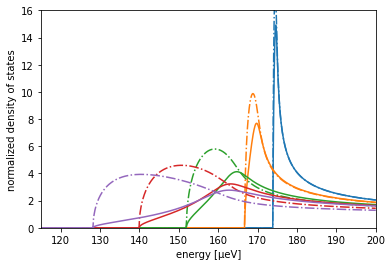

In [4]:
figure, axes = plt.subplots()
for d in d_ti:
    # Define the superconductors.
    al = Superconductor(d_al, rho_al, t, td_al, tc_al, dc_al)
    ti = Superconductor(d, rho_ti, t, td_ti, tc_ti, dc_ti)

    # Fix the number of Matsubara frequencies to what is used in the paper.
    # Typically, the number of frequencies used is determined from the Debye
    # temperature for the material.
    al.nc = 125
    ti.nc = 125

    # Add the superconductors to the bilayer.
    stack = Stack([al, ti], rb)

    # The paper also uses a lower relative convergence tolerance and does not
    # use Steffensen's iterations to speed up the convergence.
    stack.rtol = 1e-3
    stack.speedup = False

    # Do the simulation.
    stack.update_dos()

    # Plot the density of states at the open boundaries.
    stack.plot_dos(axes=axes, location=[['bottom'], ['top']],
                   fix_color=True, legend=False, energy_scale='µeV')

axes.set_ylim(0, 16)
axes.set_xlim(115, 200);